# Part 1: Data Preprocessing

## Importating the Libraries and dataset

In [285]:
import numpy as np  # For dealing with arrays
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For plotting and visualization
import seaborn as sns  # For enhanced data visualization

In [287]:

# Load the dataset
dataset = pd.read_csv(r'C:\Users\JR\Desktop\ML Project\data.csv')

# Display the first few rows of the dataset
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Data exploration

In [288]:
# Display the shape of the dataset
dataset.shape

(569, 32)

In [289]:
# Display information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [291]:
# Select and display the categorical variables
categorical_variables = dataset.select_dtypes(include='object').columns
categorical_variables

Index(['diagnosis'], dtype='object')

In [290]:
# Count the number of categorical variables
num_categorical_variables = len(dataset.select_dtypes(include='object').columns)

# Display the count
num_categorical_variables

1

In [292]:
# Select and display the numerical variables
numerical_variables = dataset.select_dtypes(include=['float64', 'int64']).columns
numerical_variables

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [293]:
# Count the number of numerical variables
num_numerical_variables = len(dataset.select_dtypes(include=['float64', 'int64']).columns)

# Display the count
num_numerical_variables

31

In [296]:
# Generate a statistical summary of the dataset
statistical_summary = dataset.describe()
#Display the statistical summary
statistical_summary

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [297]:
# List the columns in the dataset
columns_list = dataset.columns

# Display the list of columns
columns_list

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

## Dealing with the missing values

In [298]:
# Check for any missing values in the dataset
has_missing_values = dataset.isnull().values.any()

# Display the result
has_missing_values

np.False_

## Dealing with categorical Data

In [299]:
# Select and display the categorical variables
categorical_variables = dataset.select_dtypes(include='object').columns
categorical_variables

Index(['diagnosis'], dtype='object')

In [300]:
# Display the unique values in the 'diagnosis' column
unique_diagnosis_values = dataset['diagnosis'].unique()
unique_diagnosis_values

array(['M', 'B'], dtype=object)

In [301]:
# Count the number of unique values in the 'diagnosis' column
num_unique_diagnosis = dataset['diagnosis'].nunique()
# Display the count
num_unique_diagnosis

2

In [302]:
# Perform one-hot encoding on categorical data, dropping the first level to avoid dummy variable trap
dataset = pd.get_dummies(data=dataset, drop_first=True)

# Display the updated dataset
dataset

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,True
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,True
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,True
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,True
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,True
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,True
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,True
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,True


## Countplot

In [303]:

# Create a count table for the 'diagnosis_M' column
count_table = dataset['diagnosis_M'].value_counts()

# Display the count table
count_table

diagnosis_M
False    357
True     212
Name: count, dtype: int64

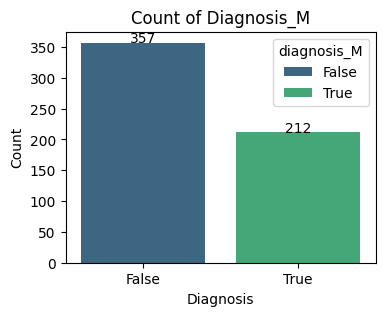

In [304]:
# Perform one-hot encoding on categorical data, dropping the first level
dataset = pd.get_dummies(data=dataset, drop_first=True)

# Set up the figure size
plt.figure(figsize=(4, 3))

# Create the count plot
sns.countplot(data=dataset, x='diagnosis_M', hue='diagnosis_M', palette="viridis", dodge=False)

# Set plot title and labels
plt.title("Count of Diagnosis_M", fontsize=12)
plt.xlabel("Diagnosis", fontsize=10)
plt.ylabel("Count", fontsize=10)

# Annotate the count on top of each bar
count_table = dataset['diagnosis_M'].value_counts()
for index, value in enumerate(count_table):
    plt.text(x=index, y=value + 0.2, s=str(value), ha='center', fontsize=10)

# Show the plot
plt.show()

In [305]:
# Count the number of False values in the 'diagnosis_M' column
false_count = (dataset.diagnosis_M == False).sum()

# Display the count of False values
false_count

np.int64(357)

In [306]:
# Count the number of True values in the 'diagnosis_M' column
true_count = (dataset.diagnosis_M == True).sum()

# Display the count of True values
true_count

np.int64(212)

## Correlation matrix and heatmap

In [307]:
# Drop the 'diagnosis_M' column
dataset_2 = dataset.drop(columns='diagnosis_M')

# Display the updated dataset
dataset_2

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


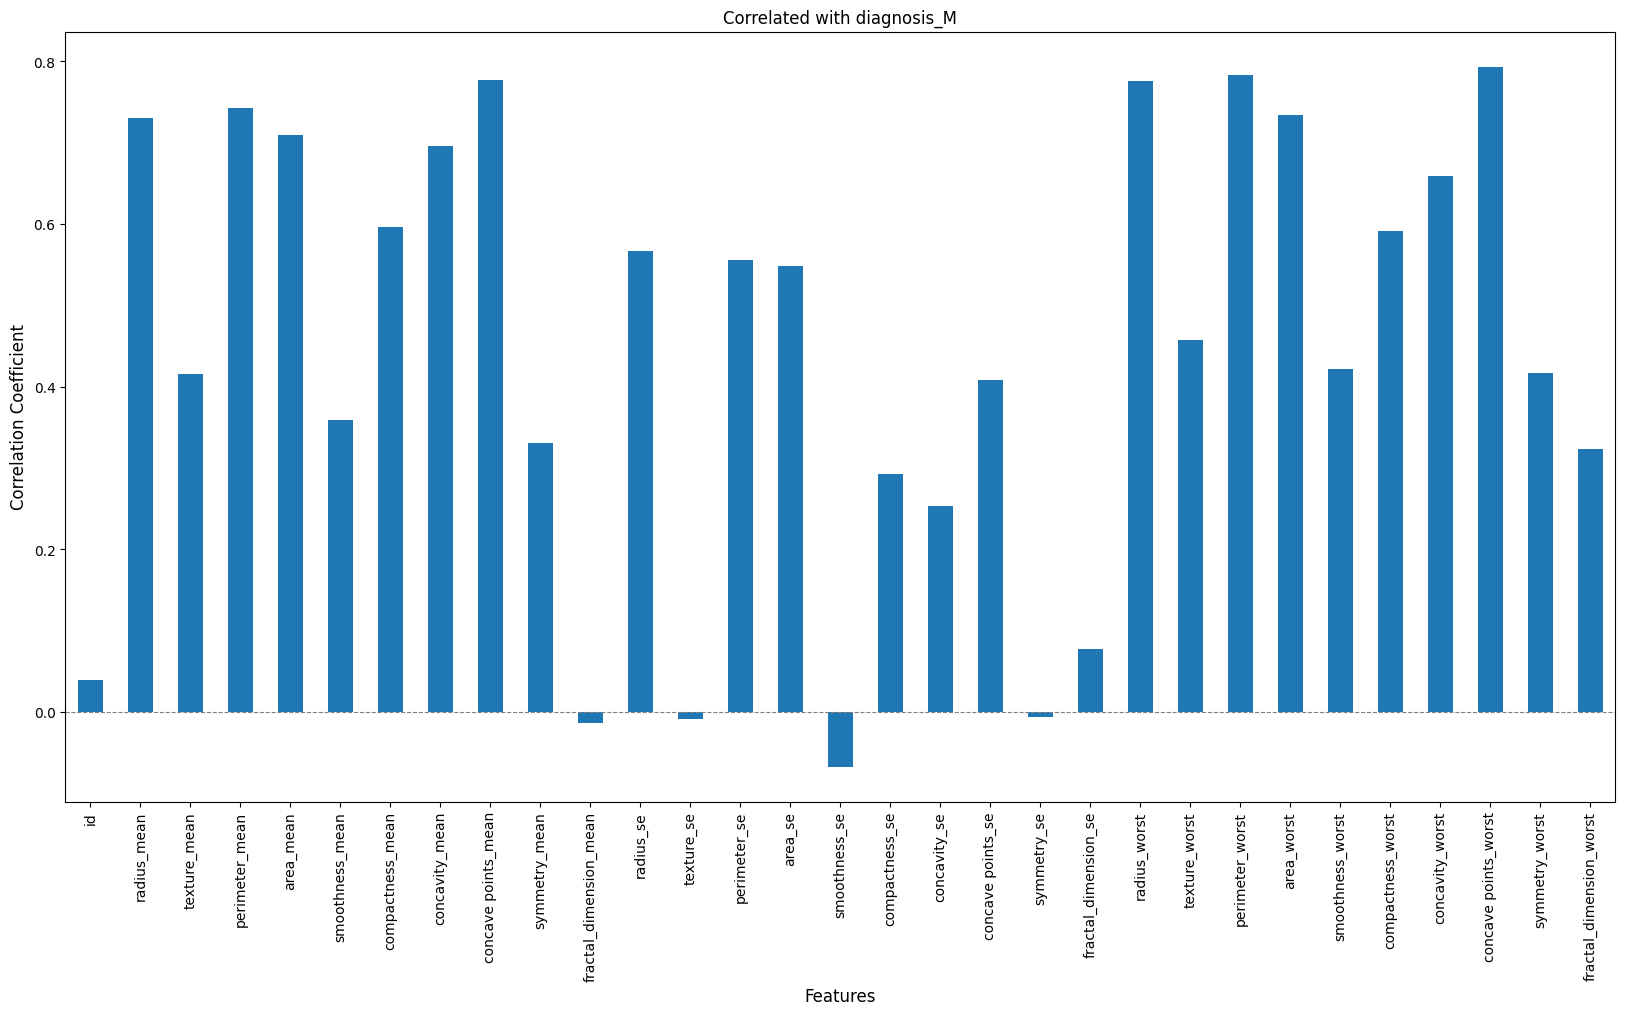

In [308]:
correlation = dataset_2.corrwith(dataset['diagnosis_M'])
correlation.plot.bar(figsize=(20, 10), title='Correlated with diagnosis_M')

# Show the plot
plt.xlabel("Features", fontsize=12)
plt.ylabel("Correlation Coefficient", fontsize=12)
plt.axhline(0, color='gray', linewidth=0.8, linestyle='--')  # Add a horizontal line at y=0
plt.show()

In [309]:
# Calculate the correlation matrix
corr = dataset.corr()

# Display the correlation matrix
corr

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,0.039769
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,0.730029
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,0.415185
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,0.742636
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,0.708984
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,0.358560
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,0.596534
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,0.696360
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,0.776614
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,0.330499


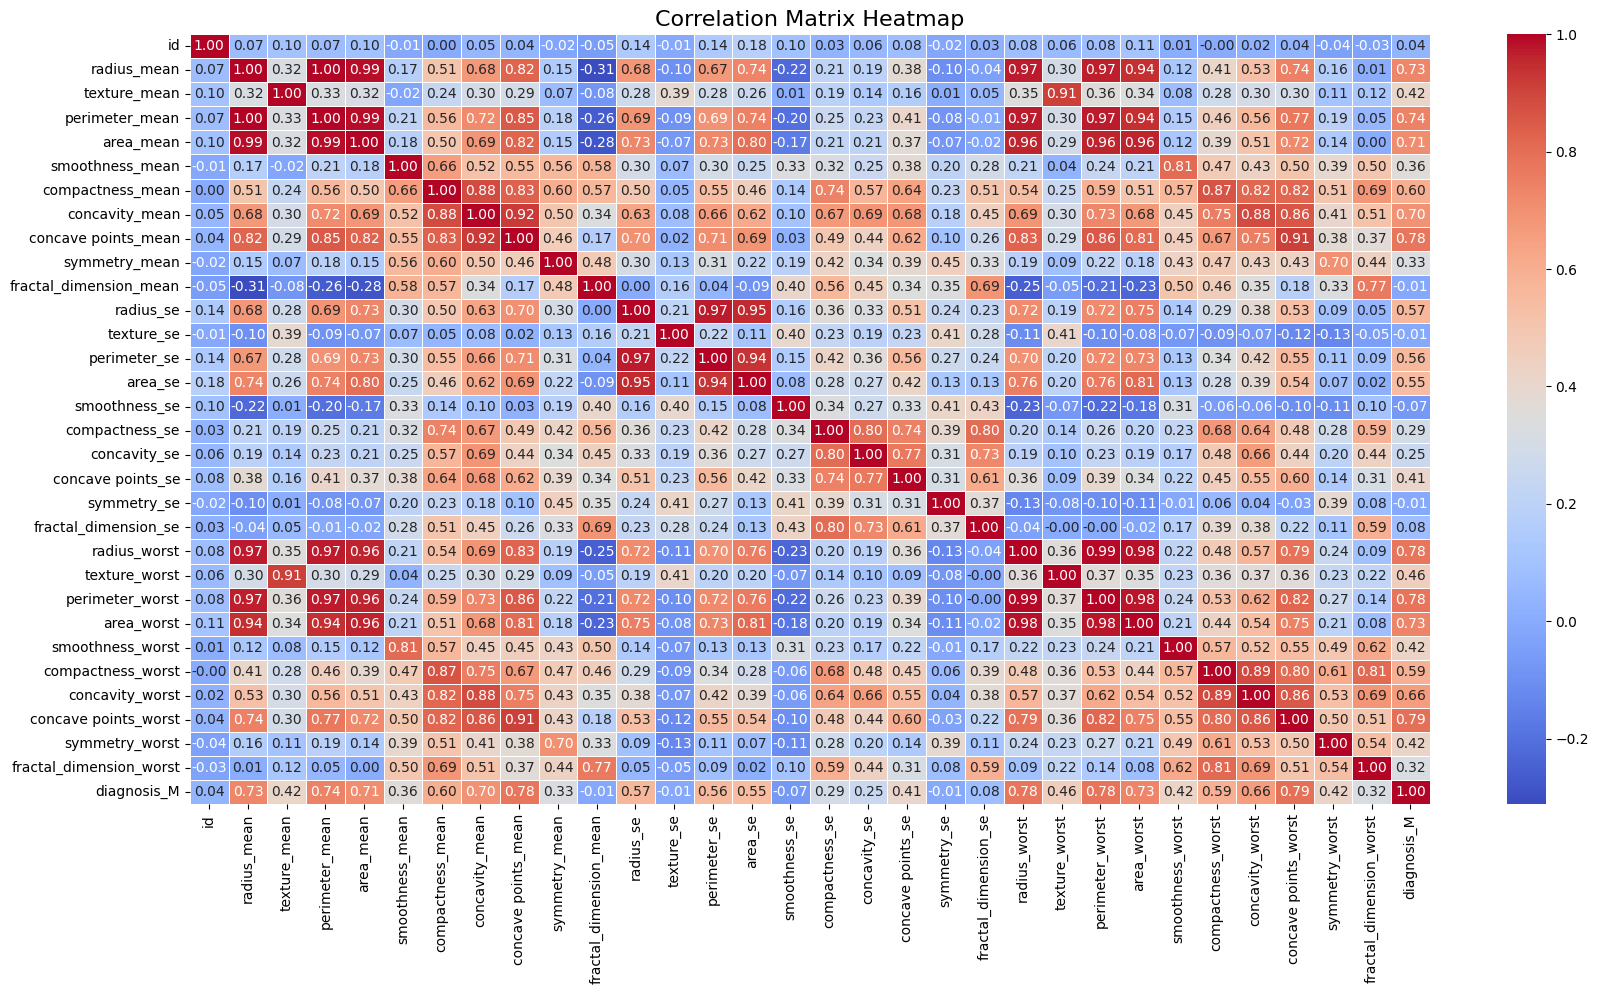

In [310]:
# Set up the figure size
plt.figure(figsize=(20, 10))

# Create the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

# Set the title
plt.title('Correlation Matrix Heatmap', fontsize=16)

# Show the plot
plt.show()

## Spliting the dataset train and test set

In [242]:
dataset.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,True
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,True
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,True
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,True
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,True


In [311]:
# Create a matrix of features (independent variables)
x = dataset.iloc[:, 1:-1].values

# Display the shape of the feature matrix
x.shape

(569, 30)

In [312]:
# Create an array of target variables (dependent variable)
y = dataset.iloc[:, -1].values

# Display the shape of the target variable array
y.shape

(569,)

In [313]:
# Import Scikit-learn library
import sklearn

# Import specific submodules
from sklearn.model_selection import train_test_split  # For splitting datasets
from sklearn.ensemble import RandomForestClassifier  # For machine learning models
from sklearn.metrics import accuracy_score  # For evaluating models
from sklearn.preprocessing import StandardScaler  # For scaling features

In [314]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Display the shapes of the resulting sets
print(f"x_train shape: {x_train.shape}, x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

x_train shape: (455, 30), x_test shape: (114, 30)
y_train shape: (455,), y_test shape: (114,)


## Feature scaling

In [251]:
# Import StandardScaler from Scikit-learn
from sklearn.preprocessing import StandardScaler  # For scaling features

In [252]:
# Create an instance of StandardScaler
sc = StandardScaler()

In [315]:
# Scale the training and testing datasets
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)  # Use transform instead of fit_transform for test set

In [316]:
# Display the scaled training feature dataset
x_train

array([[-1.15036482, -0.39064196, -1.12855021, ..., -0.75798367,
        -0.01614761, -0.38503402],
       [-0.93798972,  0.68051405, -0.94820146, ..., -0.60687023,
         0.09669004, -0.38615797],
       [ 0.574121  , -1.03333557,  0.51394098, ..., -0.02371948,
        -0.20050207, -0.75144254],
       ...,
       [-1.32422924, -0.20048168, -1.31754581, ..., -0.97974953,
        -0.71542314, -0.11978123],
       [-1.24380987, -0.2245526 , -1.28007609, ..., -1.75401433,
        -1.58157125, -1.00601779],
       [-0.73694129,  1.14989702, -0.71226578, ..., -0.27460457,
        -1.25895095,  0.21515662]])

In [317]:
# Display the scaled testing feature dataset
x_test

array([[-0.20175604,  0.3290786 , -0.13086754, ...,  1.3893291 ,
         1.08203284,  1.54029664],
       [-0.25555773,  1.46763319, -0.31780437, ..., -0.83369364,
        -0.73131577, -0.87732522],
       [-0.02619262, -0.8407682 , -0.09175081, ..., -0.49483785,
        -1.22080864, -0.92115937],
       ...,
       [ 1.71811488,  0.09318356,  1.7286186 , ...,  1.57630515,
         0.20317063, -0.15406178],
       [ 1.18859296,  0.34352115,  1.19333694, ...,  0.56019755,
         0.26991966, -0.27320074],
       [ 0.26263752, -0.58080224,  0.28459338, ..., -0.19383705,
        -1.15564888,  0.11231497]])

# Part2:Building the model

## 1) Logistic Regression

In [318]:
# Import LogisticRegression from Scikit-learn
from sklearn.linear_model import LogisticRegression  # For logistic regression model

In [319]:
# Create an instance of LogisticRegression
classifir_lr = LogisticRegression(random_state=0)

In [320]:
# Fit the logistic regression model to the training data
classifir_lr.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [321]:
# Make predictions on the testing data
y_pred = classifir_lr.predict(x_test)

In [322]:
# Import evaluation metrics from Scikit-learn
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

In [323]:
# Calculate evaluation metrics
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

# Display the results
print(f"Accuracy: {acc:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")

Accuracy: 0.96
F1 Score: 0.96
Precision: 0.96
Recall: 0.96


In [324]:
# Create a DataFrame to summarize the results
result = pd.DataFrame([['Logistic Regression', acc, f1, prec, rec]],
                      columns=['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])

# Display the result DataFrame
result

,Model,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.964912,0.957447,0.957447,0.957447


In [326]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print(cm)

[[65  2]
 [ 2 45]]


### Cross Vlidation

In [327]:
# Import cross_val_score from Scikit-learn
from sklearn.model_selection import cross_val_score  # For cross-validation

In [331]:
# Perform cross-validation to evaluate the model
accuracies = cross_val_score(estimator=classifir_lr, X=x_train, y=y_train, cv=10)

In [332]:
# Display the cross-validation accuracies
print("Cross-validation accuracies:", accuracies)
print("Mean accuracy:", accuracies.mean())

Cross-validation accuracies: [0.97826087 0.97826087 0.97826087 0.97826087 0.95652174 0.93333333
 1.         1.         0.97777778 1.        ]
Mean accuracy: 0.9780676328502416


In [333]:
# Display mean accuracy and standard deviation
print("Accuracy is {:.2f} %".format(accuracies.mean() * 100))
print("Standard Deviation is {:.2f} %".format(accuracies.std() * 100))

Accuracy is 97.81 %
Standard Deviation is 1.98 %


## Rondom forest

In [334]:
# Import RandomForestClassifier from Scikit-learn
from sklearn.ensemble import RandomForestClassifier  # For random forest classification

In [335]:
# Create an instance of RandomForestClassifier
classifier_rm = RandomForestClassifier(random_state=0)

# Fit the model to the training data
classifier_rm.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [336]:
# Make predictions on the testing data
y_pred = classifier_rm.predict(x_test)

In [337]:
# Import evaluation metrics from Scikit-learn
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

In [338]:
# Calculate evaluation metrics
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

# Display the results
print(f"Accuracy: {acc:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")

Accuracy: 0.96
F1 Score: 0.96
Precision: 0.94
Recall: 0.98


In [339]:

# Create a DataFrame to summarize the results
model_results = pd.DataFrame([['Random Forest', acc, f1, prec, rec]],
                              columns=['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])

# Display the model results DataFrame
model_results

,Model,Accuracy,F1 Score,Precision,Recall
0,Random Forest,0.964912,0.958333,0.938776,0.978723


In [341]:
# Create a DataFrame for Random Forest results if not already created
model_results = pd.DataFrame([['Random Forest', acc, f1, prec, rec]],
                              columns=['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])

# Combine the results
combined_results = pd.concat([result, model_results], ignore_index=True)

# Display the combined results DataFrame
combined_results

,Model,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.964912,0.957447,0.957447,0.957447
1,Random Forest,0.964912,0.958333,0.938776,0.978723


In [342]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print(cm)

[[64  3]
 [ 1 46]]


### Cross Validation

In [343]:
# Import cross_val_score from Scikit-learn
from sklearn.model_selection import cross_val_score  # For cross-validation

In [344]:
# Perform cross-validation to evaluate the model
accuracies = cross_val_score(estimator=classifier_rm, X=x_train, y=y_train, cv=10)

# Display mean accuracy and standard deviation
print("Accuracy is {:.2f} %".format(accuracies.mean() * 100))
print("Standard Deviation is {:.2f}%".format(accuracies.std() * 100))

Accuracy is 96.05 %
Standard Deviation is 3.07%


# Part 3: Randomized Search to find the best parameters(Logistic regression)

In [345]:
# Define parameters for RandomizedSearchCV
parameters = [
    {
        'penalty': ['l1', 'l2'],  # Only l1 and l2 for liblinear
        'C': [0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0],
        'solver': ['liblinear']
    },
    {
        'penalty': ['elasticnet'],  # Only elasticnet for saga
        'C': [0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0],
        'solver': ['saga'],
        'l1_ratio': [0.1, 0.5, 0.9]  # Include l1_ratio for elasticnet
    },
    {
        'penalty': ['l2'],  # Add l2 for saga as well
        'C': [0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0],
        'solver': ['saga']
    }
]

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=classifir_lr,  # Ensure classifir_lr is previously defined
    param_distributions=parameters,
    n_iter=10,  # Number of parameter settings sampled
    scoring='roc_auc',  # Evaluation metric
    n_jobs=-1,  # Use all available cores
    cv=10,  # 10-fold cross-validation
    verbose=3,  # Verbosity level
    error_score='raise'  # Raise errors for debugging
)

# Fit the model
random_search.fit(x_train, y_train)  # Ensure x_train and y_train are defined

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, error_score='raise',
                   estimator=LogisticRegression(random_state=0), n_jobs=-1,
                   param_distributions=[{'C': [0.25, 0.5, 0.75, 1.0, 1.25, 1.5,
                                               1.75, 2.0],
                                         'penalty': ['l1', 'l2'],
                                         'solver': ['liblinear']},
                                        {'C': [0.25, 0.5, 0.75, 1.0, 1.25, 1.5,
                                               1.75, 2.0],
                                         'l1_ratio': [0.1, 0.5, 0.9],
                                         'penalty': ['elasticnet'],
                                         'solver': ['saga']},
                                        {'C': [0.25, 0.5, 0.75, 1.0, 1.25, 1.5,
                                               1.75, 2.0],
                                         'penalty': ['l2'],
                                         'solver': ['saga']}],
                   scoring='roc_auc', verbose=3)

In [346]:
# Get the best estimator from the random search
best_model = random_search.best_estimator_

# Display the best model
print("Best Model:", best_model)

Best Model: LogisticRegression(C=0.75, penalty='l1', random_state=0, solver='liblinear')


In [347]:
# Get the best score from the random search
best_score = random_search.best_score_

# Display the best score
print("Best Score (ROC AUC): {:.4f}".format(best_score))

Best Score (ROC AUC): 0.9973


In [348]:
# Get the best parameters from the random search
best_params = random_search.best_params_

# Display the best parameters
print("Best Parameters:", best_params)

Best Parameters: {'solver': 'liblinear', 'penalty': 'l1', 'C': 0.75}


# Part 5: Final model(Logistic regression)

In [349]:
from sklearn.linear_model import LogisticRegression  # Import LogisticRegression

# Create an instance of LogisticRegression
classifir = LogisticRegression(random_state=0)

# Fit the model to the training data
classifir.fit(x_train, y_train)

LogisticRegression(random_state=0)